### MGT451 - Assignment #7 ~ Agent-Based Simulation

**Author**: Sid Bhatia

**Date**: October 19th, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Jordan Suchow

Assignment #7 continues Assignment #6 by asking you to take a stab at creating an agent-based simulation of the behavior you described. The primary goal of the assignment is to do the thinking necessary to go from *nothing* (i.e., a blank file) to *something* (i.e., at least one line of code in furtherance of the agent-based simulation). You are welcome to make your agent-based simulation good, but that's not the primary goal of the assignment. Submit a Python file with your code and comments explaining what it does.

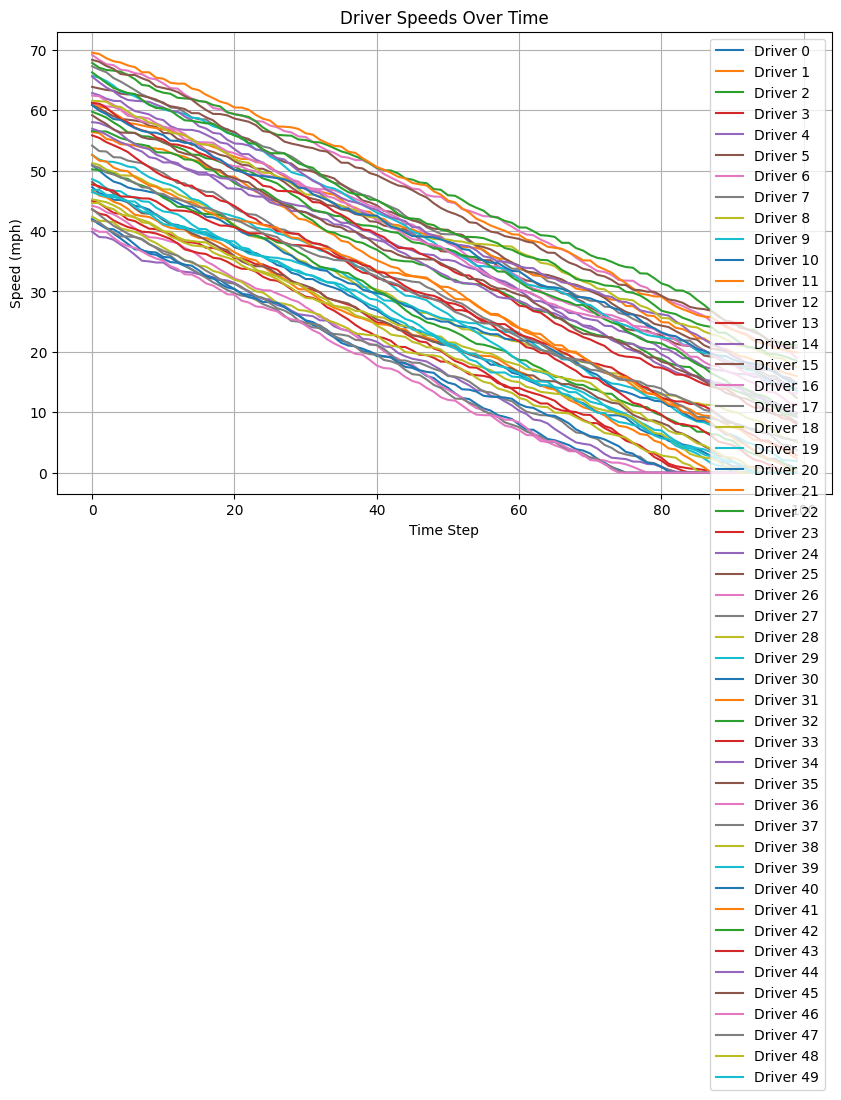

In [10]:
import random
import pandas as pd
import matplotlib.pyplot as plt

class Driver:
    def __init__(self, id, aggressiveness):
        self.id = id
        self.aggressiveness = aggressiveness
        self.speed = random.uniform(40, 70)  # Random initial speed (in mph)

    def decide_merge(self, merging_point, traffic_density):
        # Basic decision-making logic: merge if close to merging point and traffic isn't too dense
        if self.speed > 45 and merging_point - self.speed < 100 and traffic_density < 30:
            return True
        return False

    def adjust_speed(self, gap_size):
        # Basic speed adjustment logic: slow down if gap is small
        if gap_size < 30:
            self.speed -= 5

    def merge(self):
        # Basic merging behavior: accept the gap and merge
        self.speed += 10

class Simulation:
    def __init__(self, num_drivers, merging_point, traffic_density):
        self.drivers = [Driver(id, random.uniform(0.1, 1.0)) for id in range(num_drivers)]
        self.merging_point = merging_point
        self.traffic_density = traffic_density

    def run(self):
        for driver in self.drivers:
            if driver.decide_merge(self.merging_point, self.traffic_density):
                gap_size = random.uniform(10, 50)  # Random gap size for simplicity
                driver.adjust_speed(gap_size)
                driver.merge()
            # Update positions based on speed
            driver.speed -= random.uniform(0, 1)  # Random speed fluctuation
            driver.speed = max(driver.speed, 0)  # Ensure speed doesn't go negative

    def collect_data(self):
        data = []
        for driver in self.drivers:
            data.append({'DriverID': driver.id, 'Speed': driver.speed})
        return pd.DataFrame(data)

if __name__ == "__main__":
    num_drivers = 50
    merging_point = 500  # Distance to merging point (in meters)
    traffic_density = 25  # Number of vehicles per kilometer
    num_time_steps = 100  # Number of time steps for the simulation

    simulation = Simulation(num_drivers, merging_point, traffic_density)

    speed_data = []
    for _ in range(num_time_steps):
        simulation.run()
        speed_data.append(simulation.collect_data())

    # Visualize driver speeds over time
    speed_df = pd.concat(speed_data)
    plt.figure(figsize=(10, 6))
    for driver_id in range(num_drivers):
        driver_data = speed_df[speed_df['DriverID'] == driver_id]
        plt.plot(range(num_time_steps), driver_data['Speed'], label=f'Driver {driver_id}')

    plt.xlabel('Time Step')
    plt.ylabel('Speed (mph)')
    plt.legend(loc='upper right')
    plt.title('Driver Speeds Over Time')
    plt.grid(True)
    plt.show()